# Анализ и закономерности факторов влияющих на успешность продаж в игровой индустрии

**Мы имеем следующие цели анализа:**

- Выявить закономерности, определяющие успешность игры;

- Проверить гипотезы:
    - a. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - b. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
Данные из открытых источников о продажах игр, об оценках пользователей и экспертов, жанры и платформы.

# Факторы и закономерности влияющие на успешнось тайтла

## Ознакомление с данными

### Получение информации о датафрейме

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from scipy import stats as st
import numpy as np

In [2]:
data = pd.read_csv('~/game-analytics/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Определим количество пропусков

In [9]:
# Определим количество пропусков
empty_columns = pd.DataFrame(data.isna().sum().sort_values(ascending=False)).style.background_gradient('coolwarm')
empty_columns

,0
Critic_Score,8578
Rating,6766
User_Score,6701
Year_of_Release,269
Name,2
Genre,2
Platform,0
NA_sales,0
EU_sales,0
JP_sales,0


Предварительная оценка покзала наибольшее количество пропусков наблюдается в столбцах:
- Critic_Score — оценка критиков - 8578
- User_Score — оценка пользователей - 6766
- Rating — рейтинг от организации ESRB - 6701
- Year_of_Release - 269
- Name - 2
- Genre - 2

Предложения по предобработке данных:

Для изучения закономерностей при которых не учитываются оценки игры, предлагается не удалять строки с пропусками оценок:

- Critic_Score — оставить пропуски
- User_Score — оставить пропуски
- Rating — оставить пропуски
- Year_of_Release - удалить строку
- Name - удалить строку
- Genre - удалить строку

Для изучения показателей связанных с рейтингами, предлагается вести работу только со строками, где имеются все необходимые оценки.

### Приведем названия столбцов к нижнему регистру

In [10]:
data.columns = data.columns.str.lower()

**Сразу удалим лишние строки**

In [11]:
# Имя
data = data.dropna(subset=['name'])
# Жанр
data = data.dropna(subset=['genre'])
# Год релиза
data = data.dropna(subset=['year_of_release'])

In [12]:
# Удалим явные дубликаты и обновим индексы
data = data.drop_duplicates().reset_index(drop=True) 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Перобразуем данные в подходящий тип

In [14]:
# преобразуем год выпуска в тип int
data['year_of_release'] = data['year_of_release'].astype('int')

Аббревиатура "tbd" расшифровывается как как To Be Determined, следовательно не текущий момент оценки нет. На его место ставим пропуск

In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [16]:
# Преобразуем оценку пользователей в формат float
data['user_score'] = data['user_score'].astype('float')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Проверим догадки по поводу пропусков

Проверим отсутствие рейтинга у игр отностительно года выпуска

In [18]:
data.query('rating.isna()').value_counts('year_of_release')

year_of_release
2010    456
2008    446
2011    433
2009    415
2007    376
1998    347
2006    328
2012    298
1999    296
2015    291
1997    270
1996    256
2014    236
2005    233
2013    228
2016    222
1995    219
2000    202
2002    174
2004    164
2003    162
2001    143
1994    120
1993     60
1981     46
1991     41
1992     41
1982     36
1986     21
1989     17
1983     17
1990     16
1987     16
1988     14
1984     14
1985     13
1980      9
dtype: int64

In [19]:
data.query('rating.isna()').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6676 entries, 1 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6676 non-null   object 
 1   platform         6676 non-null   object 
 2   year_of_release  6676 non-null   int64  
 3   genre            6676 non-null   object 
 4   na_sales         6676 non-null   float64
 5   eu_sales         6676 non-null   float64
 6   jp_sales         6676 non-null   float64
 7   other_sales      6676 non-null   float64
 8   critic_score     81 non-null     float64
 9   user_score       83 non-null     float64
 10  rating           0 non-null      object 
dtypes: float64(6), int64(1), object(4)
memory usage: 625.9+ KB


Показатели говорят о о том, что при отсутствии рейтинга у игры, также отсутствует ~99% оценок со стороны пользователей и критиков. Также рейтинг отсутствует в только у игр выпущенных до 2011 года. Это может быть связано с упрощением процессов присуждения рейтинга в 2011 году:

*выдержка из википедии*

«В апреле 2011 года ESRB представила свою краткую форму, бесплатный упрощенный, автоматизированный процесс присвоения рейтингов для консольных загружаемых игр, как способ решения проблемы быстро растущего объема игр, поставляемых в цифровом виде. Вместо того, чтобы заставлять оценщиков проверять каждый продукт (длинная форма), издатели этих игр заполняют серию вопросов с несколькими вариантами ответов, которые касаются контента по соответствующим категориям, включая насилие, сексуальное содержание, язык и т.д. Ответы автоматически определяют категорию рейтинга игры и описания контента. Игры, оцененные с помощью этого процесса, могут быть протестированы после выпуска, чтобы убедиться, что контент был должным образом раскрыт.»

Пропуски в столбцах могут быть обусловлены отсутствием информации в базе данных, откуда взята информация по играм и их рейтингам.

Исходя из того, что оценки пользователей и критиков имеют разные критерии. На оценки критиков влияет социальная повестка, политика издателя по отношению к критикам и работа издателей со СМИ. В свою очередь на оценки пользователей в большей степени влияет персональный игровой опыт, попадание в целевую аудиторию и политика компании. Поэтому пропуски будут оставлены как есть.

### Посчитаем суммарные продажи во всех регионах

In [20]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Ознакомление с данными

### Выпук игр в разные годы

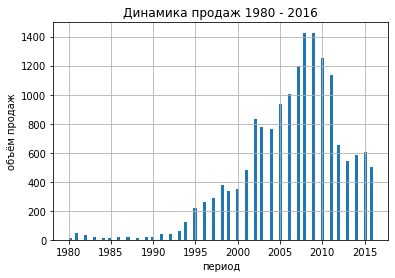

In [22]:
# Построим гистограмму выпуска игр по годам
data['year_of_release'].hist(bins=100)

plt.xlabel('период')
plt.ylabel('объём продаж')
plt.title('Динамика продаж 1980 - 2016')
plt.show()


На текущий момент динамика выпуска игр снизилась более чем в 2 раза в сравнеии с 2009 годом. По вопросу важности данных есть два варианта, отбросить данные до 1995 года, как незначительные. Так как мы интернет-магазин, нам необходимо учитывать свежие тенденции игровой индустрии, поэтому далее будем использовать данные начиная с резкого падения рынка компьютерных игр, начиная с 2012 года.

### Динамика продаж по платформам

In [23]:
top_platform_total = data.pivot_table(index='platform', values='total_sales',
                                      aggfunc=('sum')).sort_values(by='total_sales', ascending=False).head()
top_platform_total

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


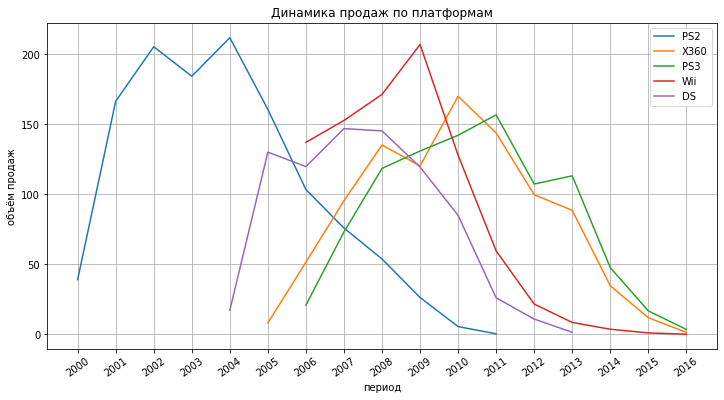

In [24]:
plt.figure(figsize=(12, 6))
plt.grid()
plt.xticks(np.arange(1985, 2017), rotation=35)
plt.xlabel('период')
plt.ylabel('объём продаж')
plt.title('Динамика продаж по платформам')


for i in top_platform_total.index:
    a = data[(data['platform'] == i) & (data['year_of_release'] >= 2000)].pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))
    plt.plot(a)
    
plt.legend(top_platform_total.index)
plt.show()

Наибольший финансовый результат, начиная с 1985 года показали платформы PS2, Xbox 360, Wii, PS3, Nintendo.

Как показывает график, в среднем платформа приносит стабильный доход в течение четырех лет, затем её популярность падает, она устаревает.

### Построим график за атуальный период с 2012 - 2016 год

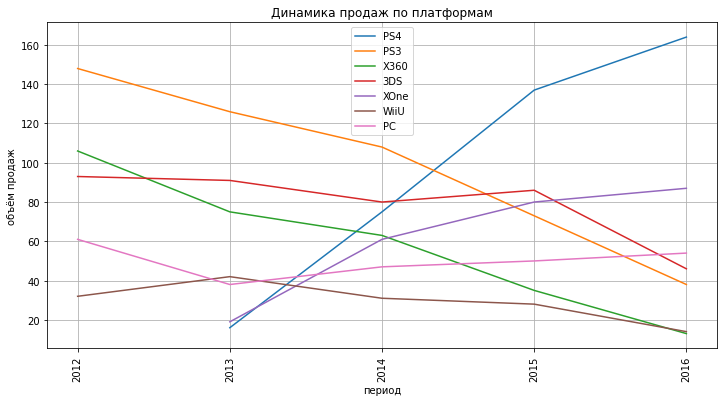

In [25]:
# Создадим датафрейм с актуальными данными
data_actual = data.loc[data['year_of_release'] >= 2012]

top_platform_actual = data_actual.pivot_table(index='platform', values='total_sales',
                                      aggfunc=('sum')).sort_values(by='total_sales', ascending=False).head(7)
plt.figure(figsize=(12, 6))
plt.grid()
plt.xticks(np.arange(1985, 2017), rotation='vertical')
plt.xlabel('период')
plt.ylabel('объём продаж')
plt.title('Динамика продаж по платформам')

for i in top_platform_actual.index:
    a = data_actual[data_actual['platform'] == i].pivot_table(index='year_of_release', values='total_sales', aggfunc=('count'))
    plt.plot(a)
    
plt.legend(top_platform_actual.index)
plt.show()

На смену PS3, Xbox360 пришли PS4, XboxOne. Также положительную динамику имеет рынок PC. 

Учитывая, что новые платформы приносят стабильную прибыль в течение четырех лет, приоритетными платформами будем считать:
- PS4
- XboxOne
- PC

In [26]:
top_platform_actual

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65


### Построим график «ящик с усами» на текущий год

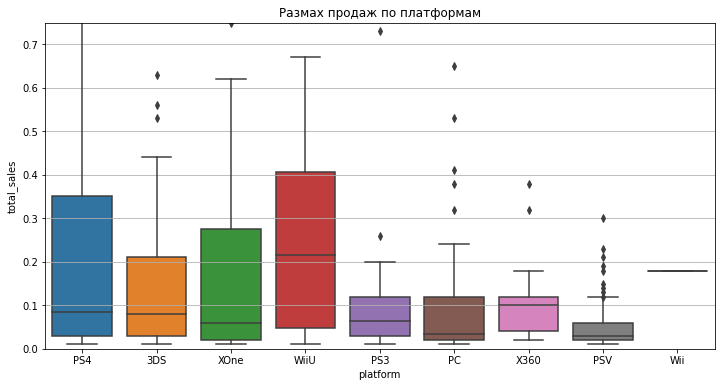

In [27]:
data_2016 = data.loc[data['year_of_release'] == 2016]

import seaborn as sns
plt.figure(figsize=(12, 6))
plt.ylim(0,0.75)
plt.grid(visible=True)
plt.xlabel('платформа')
plt.ylabel('объём продаж')
plt.title('Размах продаж по платформам')

sns.boxplot(y=data_2016['total_sales'], x=data_2016['platform'])

plt.show()

За 2016 год, наибольшую популярность показывают PS4, XboxOne, WiiU, Nintendo3DS. Согласно диаграмме, на итих платформах наибольшая вероятность выпуска успешной и продаваемой игры.

### Влияние оценок пользователей и критиков на продажи.

**Определим влияние критиков на продажи**

In [28]:
# Отфильтруем интересующую нас платформу
data_ps4_critic_score = data[(~data['critic_score'].isna()) & (data['platform'] == 'PS4')]

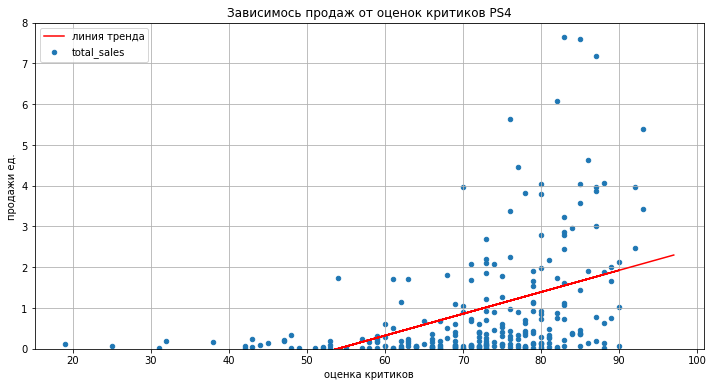

In [29]:
# Построим диаграмму рассеивания
data_ps4_critic_score.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12, 6), label='total_sales')

# Построим линию тренда
z = np.polyfit(data_ps4_critic_score['critic_score'], data_ps4_critic_score['total_sales'], 1)
p = np.poly1d(z)
plt.plot(data_ps4_critic_score['critic_score'], p(data_ps4_critic_score['critic_score']), color='r', label='линия тренда')

plt.ylim(0,8)
plt.xlabel('оценка критиков')
plt.ylabel('продажи ед.')
plt.title('Зависимось продаж от оценок критиков PS4')
plt.grid()
plt.legend()
plt.show()

In [30]:
# Посчитаем корреляцию
data_ps4_critic_score['total_sales'].corr(data_ps4_critic_score['critic_score'])

0.406567902061781

Анализ показывает среднюю положительную корреляцию, оценки критиков оказывают влияние на продажи, но не всегда.

**Определим влияние оценок игроков на продажи**

In [31]:
# Отфильтруем интересующие нас оценки
data_ps4_user_score = data[(~data['user_score'].isna()) & (data['platform'] == 'PS4')]

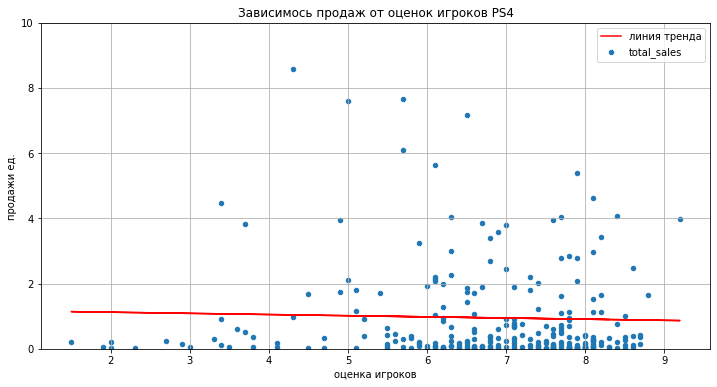

In [32]:
# Построим диаграмму рассеивания
data_ps4_user_score.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12, 6), label='total_sales')

# Построим линию тренда
z = np.polyfit(data_ps4_user_score['user_score'], data_ps4_user_score['total_sales'], 1)
p = np.poly1d(z)
plt.plot(data_ps4_user_score['user_score'], p(data_ps4_user_score['user_score']), color='r', label='линия тренда')

plt.ylim(0,10)
plt.xlabel('оценка игроков')
plt.ylabel('продажи ед.')
plt.title('Зависимось продаж от оценок игроков PS4')
plt.grid()
plt.legend()
plt.show()

In [33]:
data_ps4_user_score['total_sales'].corr(data_ps4_user_score['user_score'])

-0.031957110204556376

Анализ показал неожиданный результат. Корреляция между оценками игроков и продажами почти отсутствует, соответственно, отзывы игроков не влияют на уровень продаж.

### Посморим корреляцию на других актуальных платформах

In [34]:
# С помощью цикла заполним словарь данными о корреляции продаж и оценок
user_score_corr = {}

for i in data.query('~user_score.isna() and ~critic_score.isna() and year_of_release == 2016')['platform'].unique():
    user_corr = data[(data['platform'] == i) & (data['year_of_release'] == 2016)]['total_sales'].corr(data[data['platform'] == i]['user_score'])
    critic_corr = data[(data['platform'] == i) & (data['year_of_release'] == 2016)]['total_sales'].corr(data[data['platform'] == i]['critic_score'])
    user_score_corr[i] =  [user_corr, critic_corr]
    
all_score_corr = pd.DataFrame(user_score_corr).T
all_score_corr.columns = ['user_corr', 'critic_corr']
all_score_corr

,user_corr,critic_corr
PS4,-0.122461,0.375695
XOne,-0.130303,0.412005
WiiU,0.437630,0.486490
3DS,0.373365,0.338408
PC,0.116183,0.254152
PSV,-0.088749,0.184807


Text(0, 0.5, 'корреляция')

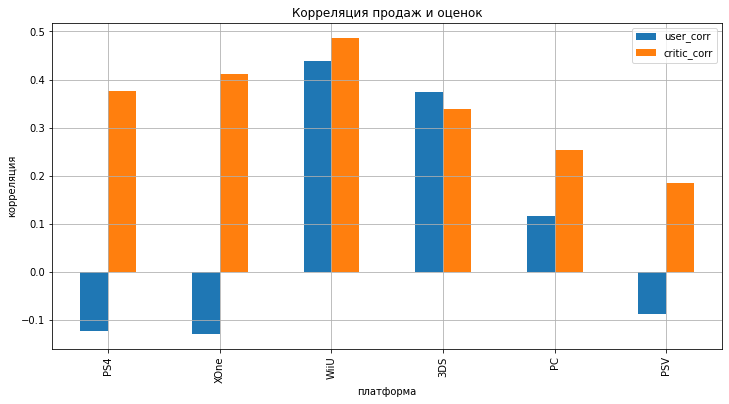

In [35]:
all_score_corr.plot.bar(figsize=(12,6), grid=True)

plt.title('Корреляция продаж и оценок')
plt.xlabel('платформа')
plt.ylabel('корреляция')

Оценка критиков оказывает большее влияние на количество продаж, чем оценка пользователей в большинстве случаев, исколючением является платформа Nintendo3DS, где пользовательские оценки имеют больший вес.

### Определим наиболее прибыльные жанры за атуальный период с 2012 - 2016 год

In [36]:
# Данные отразим в сводной таблице, посчитаем среднее количество проданных копий на игру конкретного жанра
genre_sales = data[data['year_of_release'] >= 2012].pivot_table(index='genre', values='total_sales',
                               aggfunc=('mean')).sort_values(by='total_sales', ascending=False)
genre_sales

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


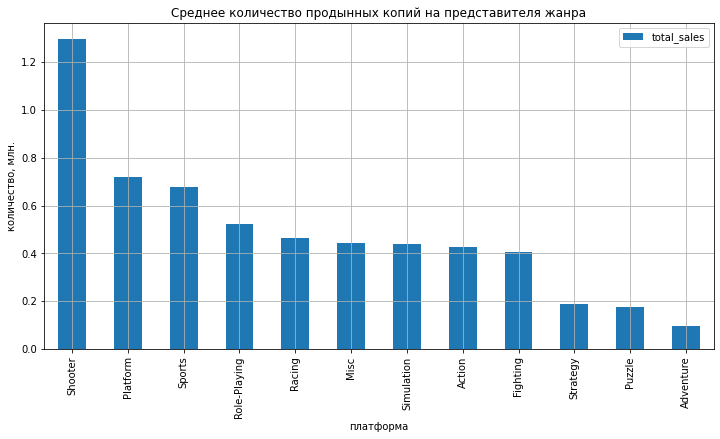

In [37]:
genre_sales.plot(kind='bar', figsize=(12,6), grid=True)

plt.title('Среднее количество продынных копий на представителя жанра')
plt.xlabel('платформа')
plt.ylabel('количество, млн.')
plt.show()

Впечатляющий результат показывает жанр шутеров, почти в 2 раза опережая платформеры. На третьем месте расположились спортивные симуляторы. Ролевые игры всего-лишт на 4-м месте, это можно объяснить тем, что ролёвки чаще всего занимают free-to-play сегмент.

## Региональный портрет пользователя

Определим наиболее популярные платформы по регионам.

,na_sales,percent
platform,,
X360,140.05,27.976428
PS4,108.74,21.721934
PS3,103.38,20.651219
XOne,93.12,18.601678
3DS,55.31,11.048742


,eu_sales,percent
platform,,
PS4,141.09,33.858891
PS3,106.86,25.644348
X360,74.52,17.883369
XOne,51.59,12.380610
3DS,42.64,10.232781


,jp_sales,percent
platform,,
3DS,87.79,50.719279
PS3,35.29,20.388237
PSV,21.04,12.155526
PS4,15.96,9.220637
WiiU,13.01,7.516321


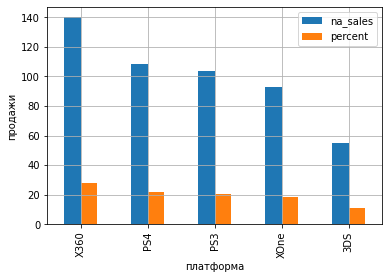

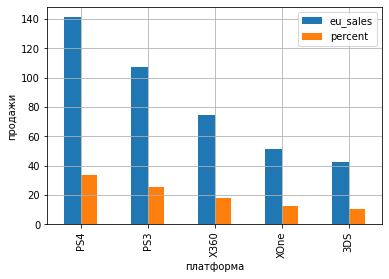

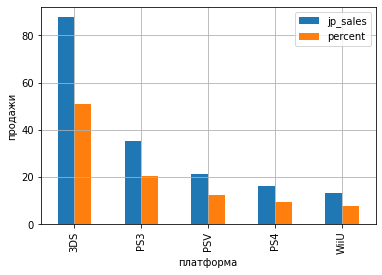

In [38]:
for i in data_actual.loc[:, 'na_sales':'jp_sales']:
    sales = data_actual.pivot_table(index='platform', values=i, aggfunc=('sum')).sort_values(by=i, ascending=False).head()
    sales['percent'] = sales[i] / sales[i].sum() * 100
    display(sales)
    
    sales.plot(kind='bar', grid=True)
    plt.xlabel('платформа')
    plt.ylabel('продажи')
    
plt.show()

Анализ на актуальный период 2012 - 2016 год показал:

1. Для Северной Америки наиболее популярны платформы XBox360, PS4 и PS3. Новая модель XBox пока что не завоевала позиции предшественника.
2. Для Европы - больше популярностью пользуются Sony. Американский XBox не так популярен у европейцев.
3. В японском сигменте полное лидерство имеет Nintendo и Sony, американский XBox крайне непопулярен, это может быть связано с особенностями национальной японской культуры.

Определим наиболее популярные жанры по регионам.

,na_sales,percent
genre,,
Action,177.84,35.123339
Shooter,144.77,28.592025
Sports,81.53,16.102147
Role-Playing,64.00,12.639978
Misc,38.19,7.542512


,eu_sales,percent
genre,,
Action,159.34,38.145169
Shooter,113.47,27.164129
Sports,69.09,16.539787
Role-Playing,48.53,11.617830
Racing,27.29,6.533084


,jp_sales,percent
genre,,
Role-Playing,65.44,43.352103
Action,52.80,34.978470
Misc,12.86,8.519377
Simulation,10.41,6.896323
Fighting,9.44,6.253726


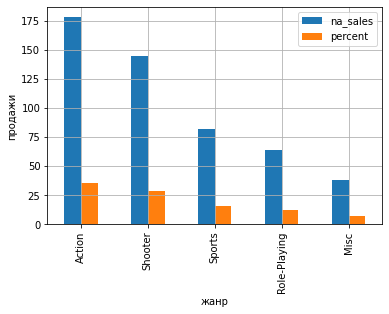

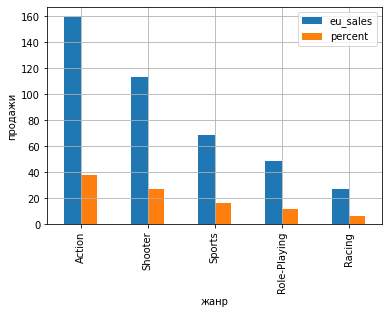

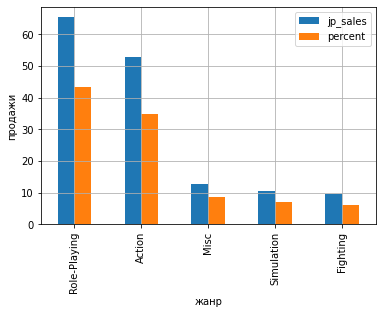

In [39]:
for i in data_actual.loc[:, 'na_sales':'jp_sales']:
    sales = data_actual.pivot_table(index='genre', values=i, aggfunc=('sum')).sort_values(by=i, ascending=False).head()
    sales['percent'] = sales[i] / sales[i].sum() * 100
    display(sales)
    
    sales.plot(kind='bar', grid=True)
    plt.xlabel('жанр')
    plt.ylabel('продажи')
    
plt.show()

Портрет американского и европейского игрока почти идетичен, у игроков похожие предпочтения, за исключением пятой по популярности позиции. Американцы больше предпочитают аркады, а европейцы - гонки.
Портрет японского игрока кардинально отличается, японцы любят ролевые игры и экшн, по остальным жанрам - результаты посредственные, при этом преобладают аркады, симуляторы и файтинги.

,na_sales,percent
rating,,
M,231.57,47.485953
E,114.37,23.452815
E10+,75.70,15.523110
T,66.02,13.538121


,eu_sales,percent
rating,,
M,193.96,46.701339
E,113.03,27.215159
E10+,55.37,13.331889
T,52.96,12.751613


,jp_sales,percent
rating,,
E,28.33,33.830905
T,26.02,31.072367
M,21.20,25.316456
E10+,8.19,9.780272


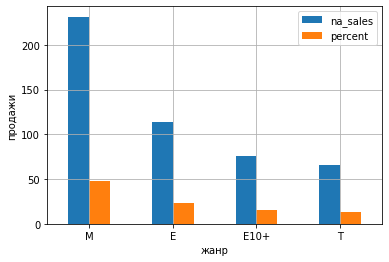

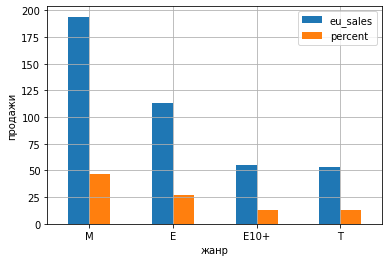

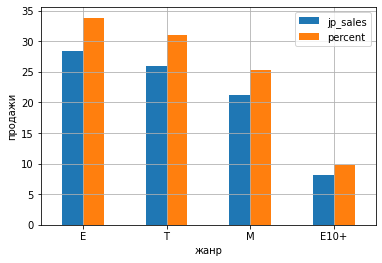

In [40]:
for i in data_actual.loc[:, 'na_sales':'jp_sales']:
    sales = data_actual.pivot_table(index='rating', values=i, aggfunc=('sum')).sort_values(by=i, ascending=False).head()
    sales['percent'] = sales[i] / sales[i].sum() * 100
    display(sales)
    
    sales.plot(kind='bar', grid=True)
    plt.xlabel('жанр')
    plt.ylabel('продажи')
    plt.xticks(rotation='horizontal')
    
plt.show()

Касательно рейтинга, можно сделать вывод, что в США и Европе среди игроков преобладает взрослая аудитория от 17 лет, игроки предпочитаю натуральное и неприкрытое насилие.
В Японии наиболее популярны игры с рейтингом "Для всех" и "Подросткам". Наиболее играющая - подростковая категория граждан, возможно это связано с более жестким законодательством касательно продажи недопустимых материалов несовершеннолетним.

## Проверка гипотез

### Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки возьмем актуальные данные за 2012-2016 год.


Для проверки этого предположения сформулируе нулевую и альтернативную гипотезу:

- H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H1 - средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

Допустимое пороговое значение alpha установим в размере 0.05

Сравним размеры выборок:

In [41]:
data_actual[(data_actual['platform'] == 'PC') & (~data_actual['user_score'].isna())]['user_score'].count()

206

In [42]:
data_actual[(data_actual['platform'] == 'XOne') & (~data_actual['user_score'].isna())]['user_score'].count()

182

Размеры выборок разные, поэтому отмерять будем по по данным XBox в размере 182 строки.

In [43]:
# Сохраним выборку xBox в переменную sample_xbox
sample_xbox = data_actual[(data_actual['platform'] == 'XOne') & (~data_actual['user_score'].isna())]['user_score'].reset_index(drop=True)

In [44]:
# Сохраним выборку PC в переменную sample_pc с длиной равной выборке xBox
sample_pc = data_actual[(data_actual['platform'] == 'PC') & (~data_actual['user_score'].isna())]['user_score'].reset_index(drop=True)
sample_pc = sample_pc.loc[:181]

In [45]:
# проведем t-тест между двумя генеральными совокупностями

alpha = 0.05

# equal_var = False так как нет уверенности в равенстве дисперсий
results = st.ttest_ind(
    sample_xbox.to_list(), 
    sample_pc.to_list(),
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.3510532864890452
Не получилось отвергнуть нулевую гипотезу


Гипотеза подтверждена, вероятность ошибиться при отвержении гипотезы 35%, что превышает пороговое значение.

### Проверим гипотезу, что средние пользовательские рейтинги жанров Action и Sports - разные.

Для проверки этого предположения сформулируе нулевую и альтернативную гипотезу следующим образом:

- H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые;
- H1 - средние пользовательские рейтинги жанров Action и Sports не одинаковые.

Допустимое пороговое значение alpha также установим в размере 0.05

In [46]:
data_actual[(data_actual['genre'] == 'Action') & (~data_actual['user_score'].isna())]['user_score'].count()

523

In [47]:
data_actual[(data_actual['genre'] == 'Sports') & (~data_actual['user_score'].isna())]['user_score'].count()

195

Уравняем размеры по меньшей генеральной совокупности

In [48]:
# оценки игр в жанре экшн
sample_action = data_actual[(data_actual['genre'] == 'Action') & (~data_actual['user_score']
                                                                 .isna())]['user_score'].reset_index(drop=True)
sample_action = sample_action[0:195]

In [49]:
# оценки игр в жанре спорт
sample_sports = data_actual[(data_actual['genre'] == 'Sports') & (~data_actual['user_score']
                                                                 .isna())]['user_score'].reset_index(drop=True)

пердположим, что совокупности равны, это будет H0.

In [50]:
# проведем t-тест между двумя генеральными совокупностями
from scipy import stats as st

alpha = 0.05

# equal_var = False так как нет уверенности в равенстве дисперсий
results = st.ttest_ind(
    sample_action.to_list(), 
    sample_sports.to_list(),
    equal_var = False)

print('p-значение:', results.pvalue)

# поменяем знак неравенства на противоположный, учитывая формулировку нулевой гипотезы
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.4908282835079883e-19
Отвергаем нулевую гипотезу


Мы отвергаем гипотезу о том, что оценки пользователей в жанре Action и Sports - одинаковые, значит мы принимаем гипотезу, что они отличаются.

## Общий вывод

**В процессе исследования были поставлены следующие задачи:**

1.	Выявить закономерности, определяющие успешность игры;
2.	Проверить гипотезы:

    a.	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
    b.	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В первую очередь был проанализирован датафрейм в размере 16715 строк. Основной массив пропусков сосредоточен в категории оценок и составил:

- 8578 пропусков – «Оценка критиков»
- 6766 пропусков – «Рейтинг»
- 6701 пропусков – «Оценки пользователей»
- 269 пропусков – «Год релиза»
- 2 пропуска – «Название»
- 2 пропуска – «Жанр»

Для изучения закономерностей при которых не учитываются оценки игры, предложено не удалять строки с пропусками оценок, по отдельным столбцам приняты следующие решения:

-	Critic_Score — оставить пропуски
-	User_Score — оставить пропуски
-	Rating — оставить пропуски
-	Year_of_Release - удалить строки (отсутствие критически важной информации)
-	Name - удалить строку (отсутствие критически важной информации)
-	Genre - удалить строку (отсутствие критически важной информации)

Для изучения показателей связанных с рейтингами, предлагается вести работу только со строками, где имеются все необходимые оценки. Данные использованы за актуальный период 2012 – 2016 год.

После предобработки, размер датафрейма сократился до 16444 строк. Был дополнительно изучен столбец rating, пропуски присутствовали только в играх, выпущенных до 2011 года, что может быть обусловлено упрощением процесса присвоения рейтингов ESRB.

**Исследование показало, что общая динамика продаж имела возрастающую тенденцию, но в 2012 сильно сократилась.**

Резкий спад может быть связан с устареванием многих конкурирующих платформ и удорожанием производства отдельных игровых проектов. В исторической ретроспективе первенство пр количеству проданных копий занимают:

- PS2 – 1043 млн.
- Xbox360 – 876 млн.
- Wii – 813 млн.

В среднем, стабильные продажи по этим платформам держались в течение четырех лет с момента выхода платформы, однако к 2016 году они утратили актуальность.
Начиная с 2012 года, стали набирать популярность новые платформы, показав тенденцию к росту:

- PS4 – 265 млн.
- XboxOne – 145 млн.
- PC – 56 млн.

За 2016 год, наибольшую популярность показывают:

- PS4 – 265.79 млн.
- PS3 – 245.53 млн.
- X360 – 216.14 млн.
- 3DS – 185.74 млн.
- XOne – 145.05 млн.
- WiiU – 76.24 млн.
- PC – 56.88 млн.

**Следующим этапом были проанализированы влияние оценок пользователей и критиков на продажи игры.** 

Анализ показал среднюю взаимосвязь между показателем продаж и средней оценкой критиков, а также на удивление слабое влияние оценок пользователей на продажи.

Корреляция между оценкой и продажами:

- критики 0.40 – среднее влияние
- пользователи 0.03 – незначительное

Для прогнозирования наиболее прибыльных жанров датафрейм был был проведен анализ среди самых популярных жанров.

За основу взят актуальный период 2012 – 2016 год, тройку лидеров по среднему количеству проданных копий одной игры в общем зачете составили:

- Shooter – 1.13млн.
- Platform – 0.65 млн.
- Sports – 0.59 млн.

Данные проиллюстрированы в работе.

**Далее был составлен региональный портрет пользователя.** 

Были проанализированы наиболее популярные платформы, жанры и рейтинги на территориях Северной Америки, Европы и Японии.

Анализ показал, что в целом, в предпочтения североамериканцев и европейцев схожи, наиболее популярные платформы PS4, PS3, Xbox360. В Европе наиболее популярны продукты Sony, их доля продаж составляет 60% от общего объема продаж, в Северной Америке преобладает продукция Microsoft – 46% объема продаж. 

Япония сильно отличается по предпочтениям, 58% рынка занимают продукты Nintendo, 40% заняты продуктами Sony.

В плане жанровых предпочтений игроки из Северной Америки и Европы похожи, более 60% приходятся на жанр Action и Shooter, 16% занимает жанр Sports, 11-12% Role-Playing. Разница лишь в пятой позиции. Америка предпочитает жанр Misc – 7%, а Европа – Racing – 6%.

Япония снова выделилась, японцы любят ролевые игры и экшн – 43 и 34%, по остальным жанрам - результаты посредственные, при этом преобладают аркады, симуляторы и файтинги.

Касательно рейтинга, можно сделать вывод, что в США и Европе среди игроков преобладает взрослая аудитория от 17 лет, игроки предпочитаю натуральное и неприкрытое насилие. В Японии наиболее популярны игры с рейтингом "Для всех" и "Подросткам". Наиболее играющая - подростковая категория граждан, возможно это связано с более жестким законодательством касательно продажи недопустимых материалов несовершеннолетним.

**В ходе работы были проверены 2 гипотезы посредством t-теста. Для проверки были взяты актуальные данные за 2012-2016 год.**

1.	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2.	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Гипотеза 1. – не подтверждена.**

Были взяты выборки в размере меньшей генеральной совокупности – 182 строки. Вероятность ошибки составила 35 %, что превысило пороговое значение.

**Гипотеза 2 – подтверждена.**

Были взяты выборки в размере 195 строк по размеру меньшей генеральной совокупности (жанр Спорт). Гипотеза не была опровергнута так, как при равенстве двух средних показателей, вероятность ошибки превысило пороговое значение.

Таким образом, для дальнейшей стратегии продаж магазина «Стримчик» рекомендуется закупка игр для следующих платформ: 

- PS4, PS3, Xbox One, Xbox 360, 3DS, WiiU, PC с приоритетом на ассортимент новых моделей приставок. 
- Наибольший объем закупок ключей и копий сконцентрировать на жанрах Action, Shooter и Sport.

В случае выхода на азиатский рынок рекомендуется провести дополнительный анализ рынка.
